# Analysis
This notebook is a set of script to analyse the content of the .h5 database.

## Simple histograms of energy, forces, dipole etc...
Warning : this particular script need a csv file containing energy forces and dipoles. extract_data.py need to be call on .h5 first.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import glob

def getStats(e):  
    mean = sum(e) / float(len(e))
    rms = np.sqrt(np.mean(np.square(e)))
    variance = statistics.variance(e)
    q25 = np.quantile(e, 0.25)
    q50 = np.quantile(e, 0.5)
    q75 = np.quantile(e, 0.75)
    return mean, rms, variance, q25, q50, q75

def hist(data, binwidth=2, xlabel='', outfile='out.png'):
    mean, rms, variance, q25, q50, q75 = getStats(data)
    
    sns.set_style("whitegrid")
    sns.histplot(data=data,
                 #stat = 'density',
                 binwidth=binwidth,
                 color = "cornflowerblue").set(xlabel=xlabel)
    plt.figtext(1, 0.5, "Mean = {:.6f}\nRMS = {:.6f}\nVariance = {:.6f}\nq25 = {:.6f}\nq50 = {:.6f}\nq75 = {:.6f}"
                .format(mean, rms, variance, q25, q50, q75))
    plt.tight_layout()
    plt.savefig(outfile,bbox_inches="tight", dpi=100) 

energy = []
dipole = []
dipoleX = []
dipoleY = []
dipoleZ = []
forceX = []
forceY = []
forceZ = []

data = pd.read_csv('testE.csv')
        
#Energy
hist(data['Energy'], 2, 'Energy (eV)', 'energy.png')
plt.show()

#Dipole                     
hist(data['DipoleNorm'], 0.15, 'Dipole Norm', 'dipoleNorm.png')
plt.show()
hist(data['DipoleX'], 0.15, 'Dipole X', 'dipoleX.png')
plt.show()
hist(data['DipoleY'], 0.15, 'Dipole Y', 'dipoleY.png')
plt.show()
hist(data['DipoleZ'], 0.15, 'Dipole Z', 'dipoleZ.png')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'testE.csv'

In [2]:
data = pd.read_csv('testF.csv')

#Force                
hist(data['ForceX'], 0.00001, 'Forces X', 'forceX.png')
plt.show()
hist(data['ForceY'], 0.00001, 'Forces Y', 'forceY.png')
plt.show()
hist(data['ForceZ'], 0.00001, 'Forces Z', 'forceZ.png')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'testF.csv'

## Histogram for energy comparison

Compute bins...
Compute histogram...
Plot...
Len of full db :  27283
Len of reduced db :  6645


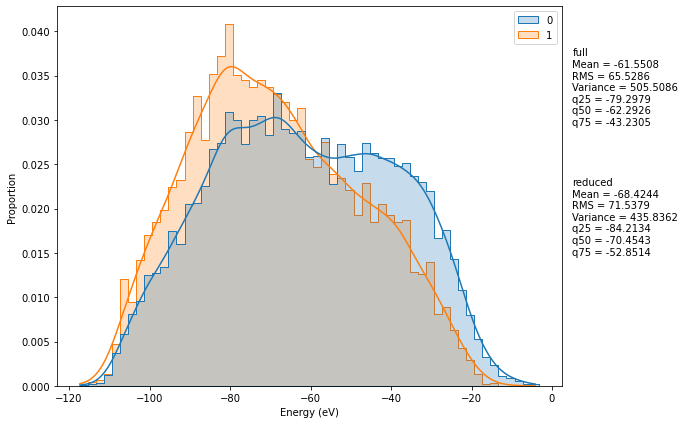

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import glob
import math

def getStats(e):  
    mean = sum(e) / float(len(e))
    variance = statistics.variance(e)
    rms = np.sqrt(np.mean(np.square(e)))
    q25 = np.quantile(e, 0.25)
    q50 = np.quantile(e, 0.5)
    q75 = np.quantile(e, 0.75)
    return mean, rms, variance, q25, q50, q75

def hist(data1, data2, binwidth=2, xlabel='', outfile='out.png'):
    minimum = np.minimum(np.min(data1), np.min(data2))
    maximum = minimum
    i = 0
    while maximum < np.maximum(np.max(data1), np.max(data2)):
        maximum += binwidth
        i+=1

    data1hist, bins1 = np.histogram(data1, i, (minimum, maximum))
    data1hist = data1hist/np.max(data1hist)

    data2hist, bins2 = np.histogram(data2, i, (minimum, maximum))
    data2hist = data2hist/np.max(data2hist)

    plt.figure(figsize=(8,6))
    plt.stairs(data1hist, bins1, label=("full (" + str(len(data1)) + " molecules)"),color=(0,0,1,0.5))
    plt.stairs(data2hist, bins2, label=("reduced (" + str(len(data2)) + " molecules)"), color=(1,0,0.2,0.5))
    plt.xlabel(xlabel)
    mean, rms, variance, q25, q50, q75 = getStats(data1)
    plt.figtext(1, 0.7, "full\nMean = {:.4f}\nRMS = {:.4f}\nVariance = {:.4f}\nq25 = {:.4f}\nq50 = {:.4f}\nq75 = {:.4f}"
                .format(mean, rms, variance, q25, q50, q75))
    mean, rms, variance, q25, q50, q75 = getStats(data2)
    plt.figtext(1, 0.4, "reduced\nMean = {:.4f}\nRMS = {:.4f}\nVariance = {:.4f}\nq25 = {:.4f}\nq50 = {:.4f}\nq75 = {:.4f}"
                .format(mean, rms, variance, q25, q50, q75))
    plt.tight_layout()
    plt.legend()
    plt.savefig(outfile,bbox_inches="tight", dpi=100)

def histsns(data1, data2, binwidth=2, xlabel='', outfile='out.png'):
    print('Compute bins...')
    minimum = np.minimum(np.min(data1), np.min(data2))
    maximum = np.maximum(np.max(data1), np.max(data2))
    i = math.ceil((maximum - minimum) / float(binwidth))
    maximum = minimum + binwidth * i

    print('Compute histogram...')
    data1hist, bins1 = np.histogram(data1, i, (minimum, maximum))
    data1hist = data1hist/np.max(data1hist)

    data2hist, bins2 = np.histogram(data2, i, (minimum, maximum))
    data2hist = data2hist/np.max(data2hist)
    
    print('Plot...')
    plt.figure(figsize=(8,6))
    sns.histplot([data1,data2], binwidth=binwidth, kde=True, stat='proportion', common_norm=False, common_bins=True,element="step")
    #plt.stairs(data1hist, bins1, label=("full (" + str(len(data1)) + " G functions)"),color=(0,0,1,0.5))
    #plt.stairs(data2hist,bins2, label=("reduced (" + str(len(data2)) + " G functions)"), color=(1,0,0.2,0.5))
    plt.xlabel(xlabel)
    
    mean, rms, variance, q25, q50, q75 = getStats(data1)
    plt.figtext(1, 0.7, "full\nMean = {:.4f}\nRMS = {:.4f}\nVariance = {:.4f}\nq25 = {:.4f}\nq50 = {:.4f}\nq75 = {:.4f}"
                .format(mean, rms, variance, q25, q50, q75))
    mean, rms, variance, q25, q50, q75 = getStats(data2)
    plt.figtext(1, 0.4, "reduced\nMean = {:.4f}\nRMS = {:.4f}\nVariance = {:.4f}\nq25 = {:.4f}\nq50 = {:.4f}\nq75 = {:.4f}"
                .format(mean, rms, variance, q25, q50, q75))
    plt.tight_layout()
    #plt.legend()
    plt.savefig(outfile,bbox_inches="tight", dpi=100)
    
e1 = []
e2 = []

data1 = pd.read_csv('fullE.csv')
data2 = pd.read_csv('full_reducedE.csv')

e1.extend(data1['Energy'])
e2.extend(data2['Energy'])


histsns(e1, e2, 2, 'Energy (eV)', 'compareEnergy_stairs.png')

print('Len of full db : ', len(e1))
print('Len of reduced db : ', len(e2))

## Histogram for G function comparison

Compute bins...
Compute histogram...
Plot...


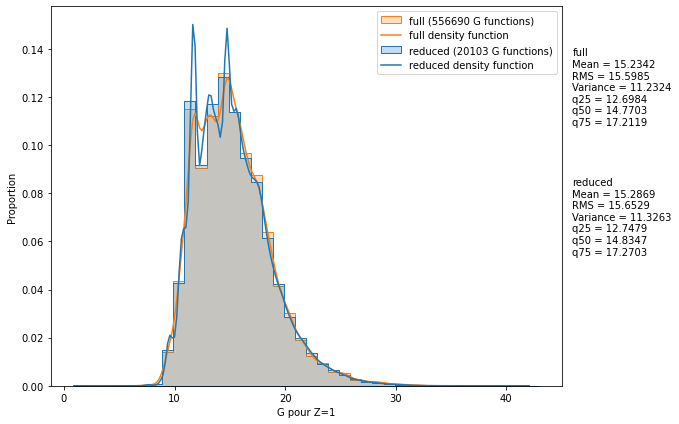

Compute bins...
Compute histogram...
Plot...


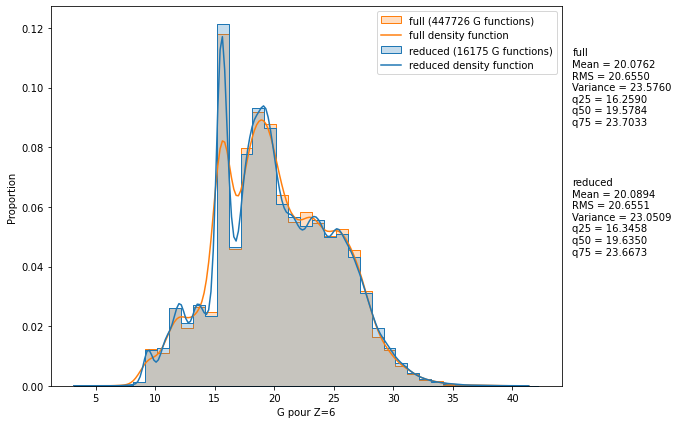

Compute bins...
Compute histogram...
Plot...


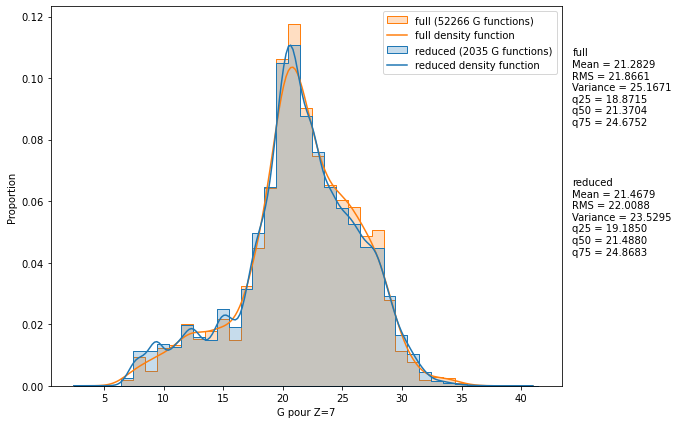

Compute bins...
Compute histogram...
Plot...


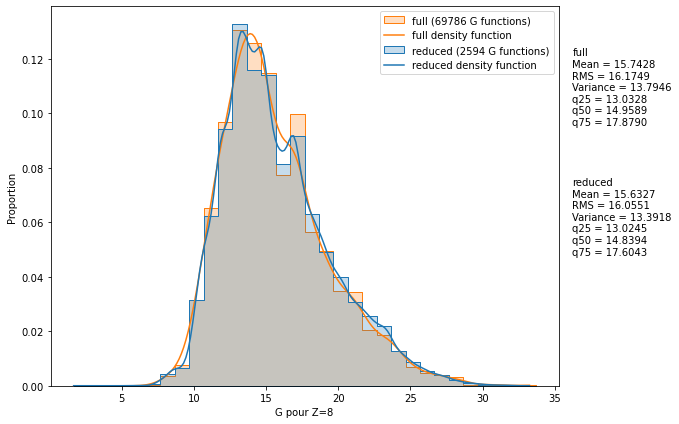

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import glob
import math

def getStats(e):  
    mean = sum(e) / float(len(e))
    rms = np.sqrt(np.mean(np.square(e)))
    variance = statistics.variance(e)
    q25 = np.quantile(e, 0.25)
    q50 = np.quantile(e, 0.5)
    q75 = np.quantile(e, 0.75)
    return mean, rms, variance, q25, q50, q75

def hist(data1, data2, binwidth=2, xlabel='', outfile='out.png'):
    print('Compute bins...')
    minimum = np.minimum(np.min(data1), np.min(data2))
    maximum = np.maximum(np.max(data1), np.max(data2))
    i = math.ceil((maximum - minimum) / float(binwidth))
    maximum = minimum + binwidth * i

    print('Compute histogram...')
    data1hist, bins1 = np.histogram(data1, i, (minimum, maximum))
    data1hist = data1hist/np.max(data1hist)

    data2hist, bins2 = np.histogram(data2, i, (minimum, maximum))
    data2hist = data2hist/np.max(data2hist)
    
    print('Plot...')
    fig = plt.figure(figsize=(8,6))
    sns.histplot([data1,data2], binwidth=binwidth, kde=True, stat='proportion', common_norm=False, common_bins=True,element="step")
    #plt.stairs(data1hist, bins1, label=("full (" + str(len(data1)) + " G functions)"),color=(0,0,1,0.5))
    #plt.stairs(data2hist,bins2, label=("reduced (" + str(len(data2)) + " G functions)"), color=(1,0,0.2,0.5))
    plt.xlabel(xlabel)
    
    mean, rms, variance, q25, q50, q75 = getStats(data1)
    plt.figtext(1, 0.7, "full\nMean = {:.4f}\nRMS = {:.4f}\nVariance = {:.4f}\nq25 = {:.4f}\nq50 = {:.4f}\nq75 = {:.4f}"
                .format(mean, rms, variance, q25, q50, q75))
    mean, rms, variance, q25, q50, q75 = getStats(data2)
    plt.figtext(1, 0.4, "reduced\nMean = {:.4f}\nRMS = {:.4f}\nVariance = {:.4f}\nq25 = {:.4f}\nq50 = {:.4f}\nq75 = {:.4f}"
                .format(mean, rms, variance, q25, q50, q75))
    plt.tight_layout()
    plt.legend(labels=[("full (" + str(len(data1)) + " G functions)"), 'full density function',("reduced (" + str(len(data2)) + " G functions)"), 'reduced density function'])
    plt.savefig(outfile,bbox_inches="tight", dpi=100)

G1 = {
    1 : [],
    6 : [],
    7 : [],
    8 : [],
}
G2 = {
    1 : [],
    6 : [],
    7 : [],
    8 : [],
}

Zs = [1,6,7,8]


for Z in Zs:
    df1 = pd.read_hdf('../GfunctionPipeline/Gout_full.h5', 'Z'+str(Z))
    df2 = pd.read_hdf('../GfunctionPipeline/1cluster_full_reduced_Gout.h5', 'Z'+str(Z))
    #Energy 
    G1[Z].extend(df1.iloc[:, 1])
    G2[Z].extend(df2.iloc[:, 1])
        
#Energy
binwidth = 1

hist(G1[1], G2[1], binwidth, 'G pour Z=1', 'compareG1.png')
plt.show()
hist(G1[6], G2[6], binwidth, 'G pour Z=6', 'compareG6.png')
plt.show()

hist(G1[7], G2[7], binwidth, 'G pour Z=7', 'compareG7.png')
plt.show()

hist(G1[8], G2[8], binwidth, 'G pour Z=8', 'compareG8.png')
plt.show()

## G function visualisation

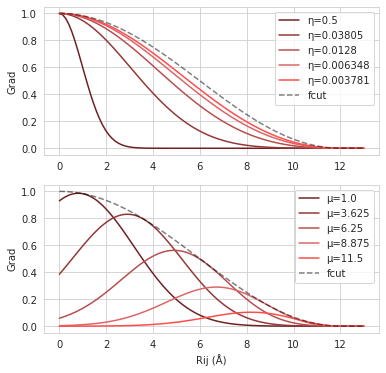

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import glob
import math

#Read eta mu and rc generated by another script and stored inside a file
def readCoefficient(file):
    eta = []
    mu = []
    rc = []
    with open(file) as f:
        next(f)
        lines = f.readlines()
        for line in lines:
            s = line.split()
            eta.append(float(s[0]))
            mu.append(float(s[1]))
            rc.append(float(s[2]))
    return np.array(eta), np.array(mu), np.array(rc)

def G(x, eta, mu, rc):
    return np.exp(-eta * (x - mu) * (x - mu)) * cutOffFunc(x, rc)

def cutOffFunc(r, rc):
    fc=np.where(r < rc, 0.5 *(np.cos( (np.pi*r)/rc) + 1 ), 0)
    return fc


eta, mu, rc = readCoefficient('../GfunctionPipeline/Gradial.txt')
R = np.linspace(0, 13, 100)

G1 = G(R, eta[0], mu[0], rc[0])
G2 = G(R, eta[1], mu[0], rc[1])
G3 = G(R, eta[2], mu[0], rc[2])
G4 = G(R, eta[3], mu[0], rc[3])
G5 = G(R, eta[4], mu[0], rc[4])

G6 = G(R, eta[5], mu[5], rc[5])
G7 = G(R, eta[5], mu[6], rc[6])
G8 = G(R, eta[5], mu[7], rc[7])
G9 = G(R, eta[5], mu[8], rc[8])
G10 = G(R, eta[5], mu[9], rc[9])

fcut = cutOffFunc(R, rc[0])


    
sns.set_style("whitegrid")
sns.color_palette("rocket")

fig, axes = plt.subplots(2,figsize=(6,6))
axes[0].plot(R, G1, color='#6F2020', label=('η=' + str(eta[0])))
axes[0].plot(R, G2, color='#933737',label=('η=' + str(eta[1])))
axes[0].plot(R, G3, color='#B74E4E',label=('η=' + str(eta[2])))
axes[0].plot(R, G4, color='#DB6565',label=('η=' + str(eta[3])))
axes[0].plot(R, G5, color='#FF4C4C',label=('η=' + str(eta[4])))
axes[0].plot(R, fcut, '--', label='fcut', color=(0,0,0,0.5))

axes[0].legend()

axes[1].plot(R, G6, color='#6F2020',label=('µ=' + str(mu[5])))
axes[1].plot(R, G7, color='#933737',label=('µ=' + str(mu[6])))
axes[1].plot(R, G8, color='#B74E4E',label=('µ=' + str(mu[7])))
axes[1].plot(R, G9, color='#DB6565',label=('µ=' + str(mu[8])))
axes[1].plot(R, G10, color='#FF4C4C', label=('µ=' + str(mu[9])))
axes[1].plot(R, fcut, '--', label='fcut', color=(0,0,0,0.5))

axes[1].legend()

axes[0].set_ylabel('Grad')
axes[1].set_ylabel('Grad')
axes[1].set_xlabel('Rij (Å)')

plt.savefig('Gfunctions.png',bbox_inches="tight", dpi=100)
    

## Histogram for multiple energy comparison

Compute bins...
Compute histogram...
Plot...


/tmp/ipykernel_6583/2464539130.py:49: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f2253440a30> has a label of '_' which cannot be automatically added to the legend.
  axes[0,0].legend(labels=['original','_', 'random (mol)','_'])
/tmp/ipykernel_6583/2464539130.py:49: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f22534590a0> has a label of '_' which cannot be automatically added to the legend.
  axes[0,0].legend(labels=['original','_', 'random (mol)','_'])
/tmp/ipykernel_6583/2464539130.py:50: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f22534f69a0> has a label of '_' which cannot be automatically added to the legend.
  axes[1,0].legend(labels=['original','_', 'random (atom)','_'])
/tmp/ipykernel_6583/2464539130.py:50: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f22534f6040> has a label of '_' which cannot be automatically added to the legend.
  axes[1,0].legend(labels=['original','_', 'random (atom)','_'])
/tmp/ipyke

Len of db :  500
Len of db :  502
Len of db :  499
Len of db :  507


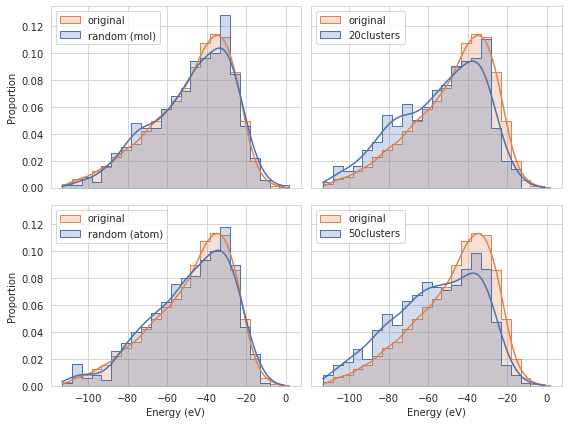

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import glob
import math
    
def histsns(data, data1, data2, data3, data4, binwidth=2, xlabel='', outfile='out.png'):
    print('Plot...')
    fig, axes = plt.subplots(2,2,figsize=(8,6), sharex=True, sharey=True)
    sns.histplot([data1, data], ax=axes[0,0], binwidth=binwidth, kde=True, stat='proportion', common_norm=False, common_bins=True,element="step")
    sns.histplot([data2, data], ax=axes[1,0], binwidth=binwidth, kde=True, stat='proportion', common_norm=False, common_bins=True,element="step")
    sns.histplot([data3, data], ax=axes[0,1], binwidth=binwidth, kde=True, stat='proportion', common_norm=False, common_bins=True,element="step")
    sns.histplot([data4, data], ax=axes[1,1], binwidth=binwidth, kde=True, stat='proportion', common_norm=False, common_bins=True,element="step")
    #plt.stairs(data1hist, bins1, label=("full (" + str(len(data1)) + " G functions)"),color=(0,0,1,0.5))
    #plt.stairs(data2hist,bins2, label=("reduced (" + str(len(data2)) + " G functions)"), color=(1,0,0.2,0.5))    
    axes[1,0].set_xlabel(xlabel)
    axes[1,1].set_xlabel(xlabel)

    plt.tight_layout()
    axes[0,0].legend(labels=['original','_', 'random (mol)','_'])
    axes[1,0].legend(labels=['original','_', 'random (atom)','_'])
    axes[0,1].legend(labels=['original','_', '20clusters','_'])
    axes[1,1].legend(labels=['original','_', '50clusters','_'])
    plt.savefig(outfile,bbox_inches="tight", dpi=100)
    
e = []
e1 = []
e2 = []
e3 = []
e4 = []

data = pd.read_hdf('../GaussianXTB2DB//Compound_000000001_000025000_CHON500noSalt_new_all.h5', 'df')
data1 = pd.read_hdf('../ReducedDBForML/Compound_000000001_000025000_CHON500noSalt_new_all_random.h5', 'df')
data2 = pd.read_hdf('../ReducedDBForML/Compound_000000001_000025000_CHON500noSalt_new_all_1cluster.h5', 'df')
data3 = pd.read_hdf('../ReducedDBForML/Compound_000000001_000025000_CHON500noSalt_new_all_20cluster.h5', 'df')
data4 = pd.read_hdf('../ReducedDBForML/Compound_000000001_000025000_CHON500noSalt_new_all_50cluster.h5', 'df')

e.extend(data.loc[:, 'Energy'])
e1.extend(data1.loc[:, 'Energy'])
e2.extend(data2.loc[:, 'Energy'])
e3.extend(data3.loc[:, 'Energy'])
e4.extend(data4.loc[:, 'Energy'])

sns.set_style('whitegrid')
sns.set_palette('deep')
histsns(e, e1, e2, e3, e4, 5, 'Energy (eV)', 'ReducedDBForML_energycompare.png')

print('Len of db : ', len(e1))
print('Len of db : ', len(e2))
print('Len of db : ', len(e3))
print('Len of db : ', len(e4))

## Histogram for multiple atom per molecule comparison

Compute bins...
Compute histogram...
Plot...


/tmp/ipykernel_6583/1359069085.py:50: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f2250194cd0> has a label of '_' which cannot be automatically added to the legend.
  axes[0,0].legend(labels=['original','_', 'random (mol)','_'])
/tmp/ipykernel_6583/1359069085.py:50: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f22501944f0> has a label of '_' which cannot be automatically added to the legend.
  axes[0,0].legend(labels=['original','_', 'random (mol)','_'])
/tmp/ipykernel_6583/1359069085.py:51: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f2248456970> has a label of '_' which cannot be automatically added to the legend.
  axes[1,0].legend(labels=['original','_', 'random (atom)','_'])
/tmp/ipykernel_6583/1359069085.py:51: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f2248428850> has a label of '_' which cannot be automatically added to the legend.
  axes[1,0].legend(labels=['original','_', 'random (atom)','_'])
/tmp/ipyke

Len of db :  500
Len of db :  502
Len of db :  499
Len of db :  507


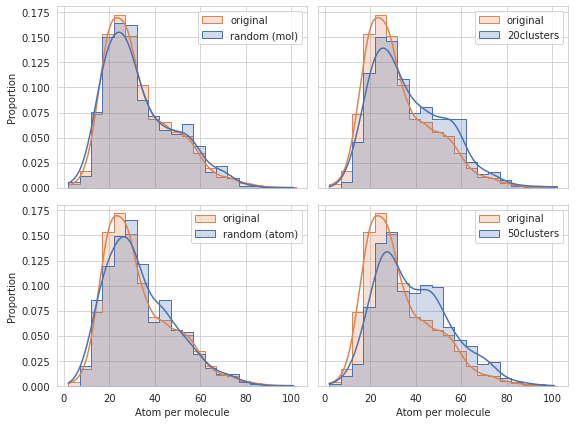

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import glob
import math

def getStats(e):  
    mean = sum(e) / float(len(e))
    variance = statistics.variance(e)
    rms = np.sqrt(np.mean(np.square(e)))
    q25 = np.quantile(e, 0.25)
    q50 = np.quantile(e, 0.5)
    q75 = np.quantile(e, 0.75)
    return mean, rms, variance, q25, q50, q75
def histsns(data, data1, data2, data3, data4, binwidth=2, xlabel='', outfile='out.png'):
    print('Plot...')
    sns.set_style("whitegrid")
    fig, axes = plt.subplots(2,2,figsize=(8,6), sharex=True, sharey=True)
    sns.histplot([data1, data], ax=axes[0,0], binwidth=binwidth, kde=True, stat='proportion', common_norm=False, common_bins=True,element="step")
    sns.histplot([data2, data], ax=axes[1,0], binwidth=binwidth, kde=True, stat='proportion', common_norm=False, common_bins=True,element="step")
    sns.histplot([data3, data], ax=axes[0,1], binwidth=binwidth, kde=True, stat='proportion', common_norm=False, common_bins=True,element="step")
    sns.histplot([data4, data], ax=axes[1,1], binwidth=binwidth, kde=True, stat='proportion', common_norm=False, common_bins=True,element="step")
    #plt.stairs(data1hist, bins1, label=("full (" + str(len(data1)) + " G functions)"),color=(0,0,1,0.5))
    #plt.stairs(data2hist,bins2, label=("reduced (" + str(len(data2)) + " G functions)"), color=(1,0,0.2,0.5))    
    axes[1,0].set_xlabel(xlabel)
    axes[1,1].set_xlabel(xlabel)
    

    plt.tight_layout()
    axes[0,0].legend(labels=['original','_', 'random (mol)','_'])
    axes[1,0].legend(labels=['original','_', 'random (atom)','_'])
    axes[0,1].legend(labels=['original','_', '20clusters','_'])
    axes[1,1].legend(labels=['original','_', '50clusters','_'])
    plt.savefig(outfile,bbox_inches="tight", dpi=100)
    
e = []
e1 = []
e2 = []
e3 = []
e4 = []

data = pd.read_hdf('../GaussianXTB2DB//Compound_000000001_000025000_CHON500noSalt_new_all.h5', 'df')
data1 = pd.read_hdf('../ReducedDBForML/Compound_000000001_000025000_CHON500noSalt_new_all_random.h5', 'df')
data2 = pd.read_hdf('../ReducedDBForML/Compound_000000001_000025000_CHON500noSalt_new_all_1cluster.h5', 'df')
data3 = pd.read_hdf('../ReducedDBForML/Compound_000000001_000025000_CHON500noSalt_new_all_20cluster.h5', 'df')
data4 = pd.read_hdf('../ReducedDBForML/Compound_000000001_000025000_CHON500noSalt_new_all_50cluster.h5', 'df')


def GetLens(df):
    Z = []
    lens = df.loc[:, 'Atoms'].apply(len)
    Z.extend(lens.values)
    return Z


e.extend(GetLens(data))
e1.extend(GetLens(data1))
e2.extend(GetLens(data2))
e3.extend(GetLens(data3))
e4.extend(GetLens(data4))

sns.set_palette('deep')
histsns(e, e1, e2, e3, e4, 5, 'Atom per molecule', 'ReducedDBForML_atomcompare.png')

print('Len of db : ', len(e1))
print('Len of db : ', len(e2))
print('Len of db : ', len(e3))
print('Len of db : ', len(e4))

## histogram for specific atom

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import glob
import math

def getStats(e):  
    mean = sum(e) / float(len(e))
    variance = statistics.variance(e)
    rms = np.sqrt(np.mean(np.square(e)))
    q25 = np.quantile(e, 0.25)
    q50 = np.quantile(e, 0.5)
    q75 = np.quantile(e, 0.75)
    return mean, rms, variance, q25, q50, q75
def histsns(data, data1, data4, binwidth=2, xlabel='', outfile='out.png'):
    
    print('Plot...')
    sns.set_style("whitegrid")
    fig, axes = plt.subplots(1,2,figsize=(8,4), sharex=True, sharey=True)
    sns.histplot([data1, data], ax=axes[0], binwidth=binwidth, kde=True, stat='proportion', common_norm=False, common_bins=True,element="step")
    sns.histplot([data4, data], ax=axes[1], binwidth=binwidth, kde=True, stat='proportion', common_norm=False, common_bins=True,element="step")
    #plt.stairs(data1hist, bins1, label=("full (" + str(len(data1)) + " G functions)"),color=(0,0,1,0.5))
    #plt.stairs(data2hist,bins2, label=("reduced (" + str(len(data2)) + " G functions)"), color=(1,0,0.2,0.5))    
    axes[0].set_xlabel(xlabel)
    axes[1].set_xlabel(xlabel)
    plt.tight_layout()
    axes[0].legend(labels=['original','_', 'random (mol)','_'])
    axes[1].legend(labels=['original','_', '50clusters','_'])
    plt.savefig(outfile,bbox_inches="tight", dpi=100)
    
e = []
e1 = []
e2 = []
e3 = []
e4 = []

data = pd.read_hdf('../GaussianXTB2DB//Compound_000000001_000025000_CHON500noSalt_new_all.h5', 'df')
data1 = pd.read_hdf('../ReducedDBForML/Compound_000000001_000025000_CHON500noSalt_new_all_random.h5', 'df')
data2 = pd.read_hdf('../ReducedDBForML/Compound_000000001_000025000_CHON500noSalt_new_all_1cluster.h5', 'df')
data3 = pd.read_hdf('../ReducedDBForML/Compound_000000001_000025000_CHON500noSalt_new_all_20cluster.h5', 'df')
data4 = pd.read_hdf('../ReducedDBForML/Compound_000000001_000025000_CHON500noSalt_new_all_50cluster.h5', 'df')



def GetH(arr):
    i = 0
    for a in arr:
        if a == 1:
            i+=1
    return i

def GetC(arr):
    i = 0
    for a in arr:
        if a == 6:
            i+=1
    return i

def GetO(arr):
    i = 0
    for a in arr:
        if a == 8:
            i+=1
    return i

def GetN(arr):
    i = 0
    for a in arr:
        if a == 7:
            i+=1
    return i


e.extend(data.loc[:, 'Atoms'].apply(GetH))
e1.extend(data1.loc[:, 'Atoms'].apply(GetH))
e4.extend(data4.loc[:, 'Atoms'].apply(GetH))

sns.set_palette('deep')
histsns(e, e1, e4, 5, 'Atom per molecule', 'ReducedDBForML_atomcompare.png')

e.extend(data.loc[:, 'Atoms'].apply(GetC))
e1.extend(data1.loc[:, 'Atoms'].apply(GetC))
e4.extend(data4.loc[:, 'Atoms'].apply(GetC))

sns.set_palette('deep')
histsns(e, e1, e4, 5, 'Atom per molecule', 'ReducedDBForML_atomcompare.png')

e.extend(data.loc[:, 'Atoms'].apply(GetN))
e1.extend(data1.loc[:, 'Atoms'].apply(GetN))
e4.extend(data4.loc[:, 'Atoms'].apply(GetN))

sns.set_palette('deep')
histsns(e, e1, e4, 5, 'Atom per molecule', 'ReducedDBForML_atomcompare.png')

e.extend(data.loc[:, 'Atoms'].apply(GetN))
e1.extend(data1.loc[:, 'Atoms'].apply(GetN))
e4.extend(data4.loc[:, 'Atoms'].apply(GetN))

sns.set_palette('deep')
histsns(e, e1, e4, 5, 'Atom per molecule', 'ReducedDBForML_atomcompare.png')

print('Len of db : ', len(e1))
print('Len of db : ', len(e2))
print('Len of db : ', len(e3))
print('Len of db : ', len(e4))


FileNotFoundError: File ../GaussianXTB2DB//Compound_000000001_000025000_CHON500noSalt_new_all.h5 does not exist